In [1]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#11ff66','#6611ff','Akronim','Smokum',30,20
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h1>"""%string))

In [2]:
dhtml('Code Modules, Setting, & Functions')

In [3]:
import numpy as np,pandas as pd
import pylab as pl,seaborn as sn
import tensorflow_datasets as tfds
from sklearn.feature_extraction.text \
import CountVectorizer
import matplotlib.patheffects as PathEffects
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as tkl
from tensorflow.keras import callbacks as tkc

In [4]:
fpath='../input/text-examples-for-processing-classification/'
pl.style.use('seaborn-whitegrid')
fw='weights.best.hdf5'

In [5]:
dhtml('Data Exploration')

In [6]:
data_russian=pd.read_csv(
    fpath+'parts_of_speech_russian.csv')
data_russian.head()

,sentences,parts_of_speech
0,археологи находят в славянских землях много кл...,существительное глагол предлог прилагательное ...
1,понаблюдайте за своими товарищами во время дис...,глагол предлог местоимение существительное пре...
2,в тех комнатах мебель закрыта была чехлами,предлог местоимение существительное существите...
3,в определённых случаях существование такой зав...,предлог прилагательное существительное существ...
4,сложные процессы протекают на всей её поверхности,прилагательное существительное глагол предлог ...


In [7]:
words_russian=np.array(
    [sentence.split() 
     for sentence in data_russian['sentences']])
words_russian=words_russian.reshape(
    words_russian.shape[0]*words_russian.shape[1])
parts_russian=np.array(
    [parts.split() 
     for parts in data_russian['parts_of_speech']])
parts_russian=\
parts_russian.reshape(
    parts_russian.shape[0]*parts_russian.shape[1])
words_russian[:10],parts_russian[:10]

(array(['археологи', 'находят', 'в', 'славянских', 'землях', 'много',
        'кладов', 'понаблюдайте', 'за', 'своими'], dtype='<U14'),
 array(['существительное', 'глагол', 'предлог', 'прилагательное',
        'существительное', 'числительное', 'существительное', 'глагол',
        'предлог', 'местоимение'], dtype='<U15'))

In [8]:
print('Data Statistics. Russian')
print('Number of sentences: {}'\
      .format(len(data_russian['sentences'])))
print('Number of words: {}'\
      .format(len(words_russian)))
print('Parts of speech: \n',
      set(parts_russian))

Data Statistics. Russian
Number of sentences: 107
Number of words: 749
Parts of speech: 
 {'деепричастие', 'наречие', 'причастие', 'местоимение', 'глагол', 'предлог', 'прилагательное', 'числительное', 'союз', 'существительное', 'частица'}


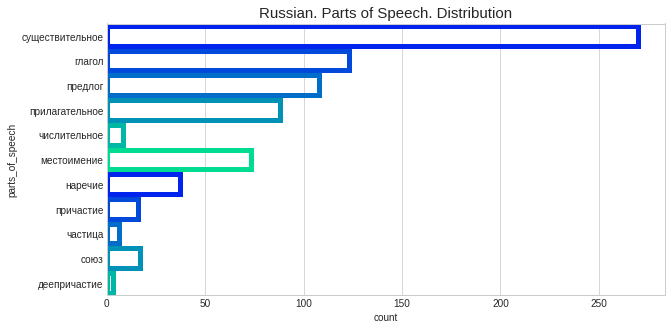

In [9]:
df_russian=pd.DataFrame(
    {'parts_of_speech':parts_russian,
     'words':words_russian})
pl.figure(figsize=(10,5))
sn.countplot(y="parts_of_speech",data=df_russian,
             facecolor=(0,0,0,0),linewidth=5,
             edgecolor=sn.color_palette("winter"))
pl.title('Russian. Parts of Speech. Distribution',
         fontsize=15);

In [10]:
data_physics=pd.read_csv(
    fpath+'parts_of_speech_physics.csv')
data_physics.head()

,sentences,parts_of_speech
0,понятиями физики пользуются в любом разделе ес...,существительное существительное глагол предлог...
1,перед вами постепенно предстанет общая картина...,предлог местоимение наречие глагол прилагатель...
2,физика занимается изучением протекающих в прир...,существительное глагол существительное причаст...
3,люди придумывали разнообразные мифы о возникно...,существительное глагол прилагательное существи...
4,человечество вступило на путь научного познани...,существительное глагол предлог существительное...


In [11]:
words_physics=np.array(
    [sentence.split() 
     for sentence in data_physics['sentences']])
words_physics=words_physics.reshape(
    words_physics.shape[0]*words_physics.shape[1])
parts_physics=np.array(
    [parts.split() 
     for parts in data_physics['parts_of_speech']])
parts_physics=\
parts_physics.reshape(
    parts_physics.shape[0]*parts_physics.shape[1])
words_physics[:10],parts_physics[:10]

(array(['понятиями', 'физики', 'пользуются', 'в', 'любом', 'разделе',
        'естествознания', 'перед', 'вами', 'постепенно'], dtype='<U19'),
 array(['существительное', 'существительное', 'глагол', 'предлог',
        'местоимение', 'существительное', 'существительное', 'предлог',
        'местоимение', 'наречие'], dtype='<U15'))

In [12]:
print('Data Statistics. Physics')
print('Number of sentences: {}'\
      .format(len(data_physics['sentences'])))
print('Number of words: {}'\
      .format(len(words_physics)))
print('Parts of speech: \n',set(parts_physics))

Data Statistics. Physics
Number of sentences: 78
Number of words: 546
Parts of speech: 
 {'наречие', 'причастие', 'местоимение', 'глагол', 'предлог', 'прилагательное', 'числительное', 'союз', 'существительное', 'частица'}


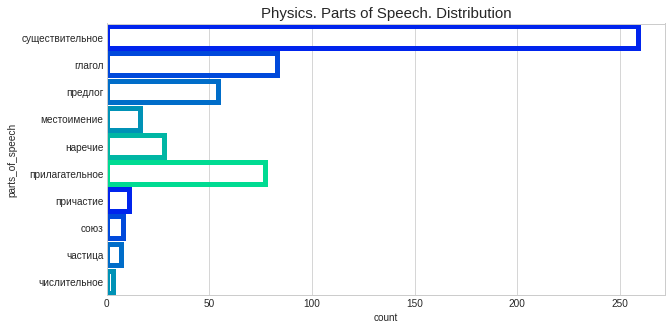

In [13]:
df_physics=pd.DataFrame(
    {'parts_of_speech':parts_physics,
     'words':words_physics})
pl.figure(figsize=(10,5))
sn.countplot(y="parts_of_speech",data=df_physics,
             facecolor=(0,0,0,0),linewidth=5,
             edgecolor=sn.color_palette("winter"))
pl.title('Physics. Parts of Speech. Distribution',
         fontsize=15);

In [14]:
dhtml("Vocabularies & Sentences' Structure")

In [15]:
def create_lookup_tables(text):
    vocabulary=set(text)
    int_to_vocab=dict(enumerate(vocabulary))
    vocab_to_int=dict((v,k) for k,v \
                      in int_to_vocab.items())
    return vocab_to_int,int_to_vocab
words=np.hstack([words_russian,words_physics])
vocab_to_int,int_to_vocab=\
create_lookup_tables(words)
parts=np.hstack([parts_russian,parts_physics])
part_to_int,int_to_part=\
create_lookup_tables(parts)

In [16]:
int_text_russian=[vocab_to_int[word] for 
                  word in words_russian]
print(int_text_russian[:10])
print(words_russian[:10])
int_parts_russian=[part_to_int[part] 
                   for part in parts_russian]
print(int_parts_russian[:10])
print(parts_russian[:10])

[381, 750, 409, 442, 128, 171, 506, 147, 315, 659]
['археологи' 'находят' 'в' 'славянских' 'землях' 'много' 'кладов'
 'понаблюдайте' 'за' 'своими']
[9, 4, 5, 6, 9, 7, 9, 4, 5, 3]
['существительное' 'глагол' 'предлог' 'прилагательное' 'существительное'
 'числительное' 'существительное' 'глагол' 'предлог' 'местоимение']


In [17]:
place_in_sentence_russian=\
np.tile(np.array(range(7)),
        len(data_russian['sentences']))
word_lengths_russian=\
np.array([len(i) for i in words_russian])
place_in_sentence_russian.shape

(749,)

In [18]:
df_russian['word_labels']=int_text_russian
df_russian['part_labels']=int_parts_russian
df_russian['place_in_sentence']=\
place_in_sentence_russian
df_russian['word_lengths']=\
word_lengths_russian
df_russian.head(10)

,parts_of_speech,words,word_labels,part_labels,place_in_sentence,word_lengths
0,существительное,археологи,381,9,0,9
1,глагол,находят,750,4,1,7
2,предлог,в,409,5,2,1
3,прилагательное,славянских,442,6,3,10
4,существительное,землях,128,9,4,6
5,числительное,много,171,7,5,5
6,существительное,кладов,506,9,6,6
7,глагол,понаблюдайте,147,4,0,12
8,предлог,за,315,5,1,2
9,местоимение,своими,659,3,2,6


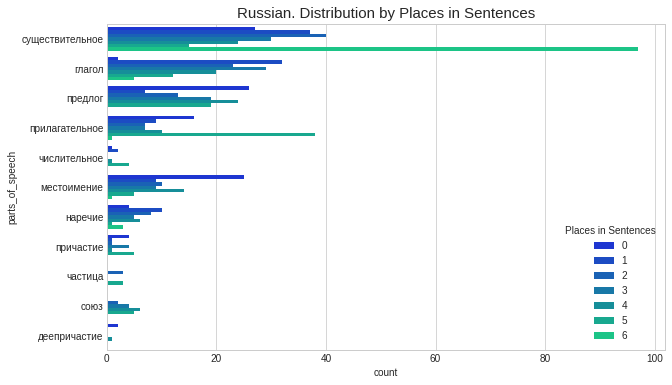

In [19]:
pl.figure(figsize=(10,6))
sn.countplot(y="parts_of_speech",
             hue='place_in_sentence',
             data=df_russian,palette='winter')
pl.legend(loc=4,title="Places in Sentences")
pl.title('Russian. Distribution by Places in Sentences',
         fontsize=15);

In [20]:
int_text_physics=[vocab_to_int[word] 
                  for word in words_physics]
print(int_text_physics[:10])
print(words_physics[:10])
int_parts_physics=[part_to_int[part] 
                   for part in parts_physics]
print(int_parts_physics[:10])
print(parts_physics[:10])

[522, 758, 943, 409, 81, 655, 369, 744, 658, 290]
['понятиями' 'физики' 'пользуются' 'в' 'любом' 'разделе' 'естествознания'
 'перед' 'вами' 'постепенно']
[9, 9, 4, 5, 3, 9, 9, 5, 3, 1]
['существительное' 'существительное' 'глагол' 'предлог' 'местоимение'
 'существительное' 'существительное' 'предлог' 'местоимение' 'наречие']


In [21]:
place_in_sentence_physics=\
np.tile(np.array(range(7)), 
        len(data_physics['sentences']))
word_lengths_physics=\
np.array([len(i) for i in words_physics])
place_in_sentence_physics.shape

(546,)

In [22]:
df_physics['word_labels']=int_text_physics
df_physics['part_labels']=int_parts_physics
df_physics['place_in_sentence']=\
place_in_sentence_physics
df_physics['word_lengths']=\
word_lengths_physics

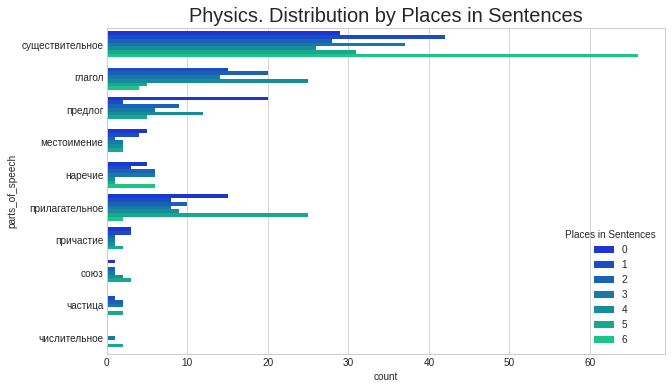

In [23]:
pl.figure(figsize=(10,6))
sn.countplot(y="parts_of_speech",
             hue='place_in_sentence',
             data=df_physics,palette='winter')
pl.legend(loc=4,title="Places in Sentences")
pl.title('Physics. Distribution by Places in Sentences',
         fontsize=20);

In [24]:
dhtml('Word Clouds')

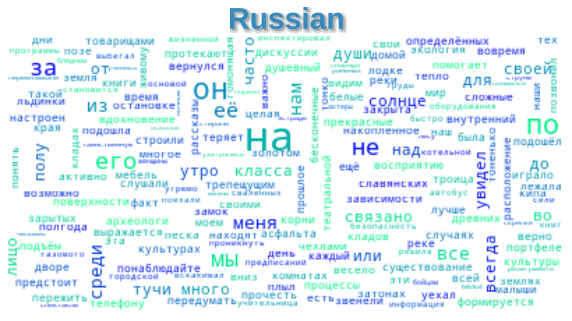

In [25]:
wordcloud_russian=WordCloud(
    max_font_size=30,
    background_color='white',
    colormap=pl.cm.winter)\
.generate(' '.join(words_russian))
pe=[PathEffects.withSimplePatchShadow(
    linewidth=4,foreground="gray")]
pl.figure(figsize=(10,11))
pl.imshow(wordcloud_russian,
          interpolation="bilinear")
pl.title("Russian", 
          fontsize=30,fontweight='bold',
          color='#348ABD',path_effects=pe)
pl.axis("off");

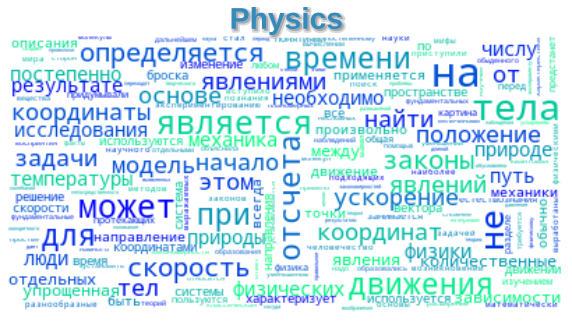

In [26]:
wordcloud_physics=WordCloud(
    max_font_size=30,
    background_color='white',
    colormap=pl.cm.winter)\
.generate(' '.join(words_physics))
pe=[PathEffects.withSimplePatchShadow(
    linewidth=4,foreground="gray")]
pl.figure(figsize=(10,11))
pl.imshow(wordcloud_physics,
          interpolation="bilinear")
pl.title("Physics", 
          fontsize=30,fontweight='bold',
          color='#348ABD',path_effects=pe)
pl.axis("off");

In [27]:
#sklearndhtml('Vectorizering')

In [28]:
#sklearn
vectorizer=CountVectorizer(analyzer="word",tokenizer=None, 
                           preprocessor=None,stop_words=None,
                           min_df=0,max_features=1000) 
features=vectorizer.fit_transform([' '.join(words)])
vocabulary=vectorizer.get_feature_names()
word_occurrences=np.sum(features.toarray(),axis=0)
print(features.shape)
print(vocabulary[:100])
print(word_occurrences[:100])

(1, 954)
['абстрактных', 'автобус', 'аисты', 'активно', 'актёры', 'алмазной', 'амфору', 'археологи', 'асфальта', 'асфальте', 'атомные', 'бабушка', 'багровея', 'без', 'безнадёжность', 'безопасность', 'белые', 'белье', 'берега', 'бесконечные', 'бледным', 'блеснул', 'бобров', 'бойцам', 'большого', 'большое', 'большой', 'борт', 'бортом', 'броска', 'будет', 'будут', 'буря', 'была', 'быстро', 'быть', 'важно', 'вами', 'варил', 'вашему', 'вдохновение', 'вектора', 'величинами', 'величиной', 'верно', 'вернулся', 'весело', 'ветвей', 'ветер', 'ветровые', 'вечерами', 'вешняя', 'вещества', 'взял', 'вид', 'видим', 'видимого', 'вниз', 'внутренний', 'внутрь', 'во', 'вовремя', 'вода', 'воде', 'воды', 'воздуха', 'воздухе', 'возле', 'возможно', 'возникновении', 'войском', 'волны', 'вольерах', 'воображения', 'восемь', 'воспоминания', 'восприятию', 'восприятия', 'восторженной', 'впервые', 'временем', 'времени', 'время', 'все', 'всегда', 'всей', 'вскакивал', 'встречи', 'вступило', 'выбегал', 'выбираются', 'в

In [29]:
analyzer=vectorizer.build_analyzer()
analyzer(' '.join(words_russian[:7])),\
analyzer(' '.join(words_physics[:7]))

(['археологи', 'находят', 'славянских', 'землях', 'много', 'кладов'],
 ['понятиями', 'физики', 'пользуются', 'любом', 'разделе', 'естествознания'])

In [30]:
set(df_russian['words'][df_russian['word_lengths']==1])

{'в', 'и', 'к', 'о', 'с', 'у', 'я'}

In [31]:
set(df_physics['words'][df_physics['word_lengths']==1])

{'в', 'и', 'к', 'о', 'с'}

In [32]:
#tensorflow
word_set=set(words); n=len(words)
encoder=tfds.features.text.TokenTextEncoder(word_set)
enc_words=[encoder.encode(word)[0] for word in words]
df_russian['enc_words']=enc_words[:len(words_russian)]
df_physics['enc_words']=enc_words[len(words_russian):]
#word_labels=enc_words-1
df_physics.head(10)

,parts_of_speech,words,word_labels,part_labels,place_in_sentence,word_lengths,enc_words
0,существительное,понятиями,522,9,0,9,523
1,существительное,физики,758,9,1,6,759
2,глагол,пользуются,943,4,2,10,944
3,предлог,в,409,5,3,1,410
4,местоимение,любом,81,3,4,5,82
5,существительное,разделе,655,9,5,7,656
6,существительное,естествознания,369,9,6,14,370
7,предлог,перед,744,5,0,5,745
8,местоимение,вами,658,3,1,4,659
9,наречие,постепенно,290,1,2,10,291


In [33]:
dhtml('Binary Classification: Russian vs Physics')

In [34]:
feature_list=['word_labels','part_labels',
              'place_in_sentence','word_lengths']
x=np.vstack([df_russian[feature_list].values,
             df_physics[feature_list].values])
x=x.reshape(x.shape[0]//7,7,4)
x.shape

(185, 7, 4)

In [35]:
# labeling texts from two types of studentbooks
# 0 => 'Russian Language', 1 => 'Physics'
zeros=np.zeros((len(words_russian)//7),dtype=int)
ones=np.ones((len(words_physics)//7),dtype=int)
y=np.concatenate((zeros,ones),axis=0)
y.shape

(185,)

In [36]:
N=y.shape[0]; n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(12).shuffle(shuffle_ids)
x=x[shuffle_ids]
y=y[shuffle_ids]
x_test,x_valid,x_train=\
x[:n],x[n:2*n],x[2*n:]
y_test,y_valid,y_train=\
y[:n],y[n:2*n],y[2*n:]

In [37]:
dhtml('NN Models')

In [38]:
def mlp_model():
    model=Sequential()
    model.add(tkl.Dense(1024,activation='relu', 
                        input_shape=(28,)))
    model.add(tkl.Dropout(.1)) 
    model.add(tkl.Dense(64,activation='relu'))
    model.add(tkl.Dropout(.1))
    model.add(tkl.Dense(1,activation='sigmoid'))
    model.compile(optimizer='nadam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
def cb(fw):
    early_stopping=tkc\
    .EarlyStopping(monitor='val_loss',
                   patience=20,verbose=2)
    checkpointer=tkc\
    .ModelCheckpoint(filepath=fw,verbose=2,
                     save_best_only=True)
    lr_reduction=tkc\
    .ReduceLROnPlateau(monitor='val_loss',verbose=2,
                       patience=5,factor=.75)
    return [checkpointer,early_stopping,lr_reduction]

In [39]:
mlp_model=mlp_model()
history=mlp_model\
.fit(x_train.reshape(-1,28),y_train,
     epochs=100,batch_size=16,verbose=2,
     validation_data=(x_valid.reshape(-1,28),y_valid),
     callbacks=cb(fw))

Epoch 1/100

Epoch 00001: val_loss improved from inf to 13.73388, saving model to weights.best.hdf5
10/10 - 0s - loss: 21.8797 - accuracy: 0.5570 - val_loss: 13.7339 - val_accuracy: 0.7222
Epoch 2/100

Epoch 00002: val_loss improved from 13.73388 to 5.98390, saving model to weights.best.hdf5
10/10 - 0s - loss: 18.6735 - accuracy: 0.5235 - val_loss: 5.9839 - val_accuracy: 0.6667
Epoch 3/100

Epoch 00003: val_loss did not improve from 5.98390
10/10 - 0s - loss: 12.6321 - accuracy: 0.4631 - val_loss: 7.1491 - val_accuracy: 0.1667
Epoch 4/100

Epoch 00004: val_loss did not improve from 5.98390
10/10 - 0s - loss: 5.2804 - accuracy: 0.6040 - val_loss: 13.0830 - val_accuracy: 0.2778
Epoch 5/100

Epoch 00005: val_loss improved from 5.98390 to 1.70003, saving model to weights.best.hdf5
10/10 - 0s - loss: 3.0137 - accuracy: 0.5839 - val_loss: 1.7000 - val_accuracy: 0.6667
Epoch 6/100

Epoch 00006: val_loss improved from 1.70003 to 1.66035, saving model to weights.best.hdf5
10/10 - 0s - loss: 1.6

In [40]:
mlp_model.load_weights(fw)
mlp_model.evaluate(x_test.reshape(-1,28),y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.7433 - accuracy: 0.5556


[0.743250846862793, 0.5555555820465088]

In [41]:
def cnn_model():
    model=Sequential()
    model.add(tkl.Conv1D(32,5,
                         padding='same', 
                         activation='relu',
                         input_shape=(7,4)))
    model.add(tkl.MaxPooling1D(pool_size=2))
    model.add(tkl.Dropout(.25))
    model.add(tkl.Conv1D(96,5,
                         padding='same',
                         activation='relu'))
    model.add(tkl.MaxPooling1D(pool_size=2))
    model.add(tkl.Dropout(.25))
    model.add(tkl.Flatten())  
    model.add(tkl.Dense(1024,activation='relu'))
    model.add(tkl.Dropout(.5))
    model.add(tkl.Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [42]:
cnn_model=cnn_model()
history=cnn_model\
.fit(x_train,y_train,
     epochs=100,batch_size=16,verbose=2,
     validation_data=(x_valid,y_valid),
     callbacks=cb(fw))

Epoch 1/100

Epoch 00001: val_loss improved from inf to 6.45198, saving model to weights.best.hdf5
10/10 - 0s - loss: 11.7095 - accuracy: 0.5369 - val_loss: 6.4520 - val_accuracy: 0.7222
Epoch 2/100

Epoch 00002: val_loss improved from 6.45198 to 1.17926, saving model to weights.best.hdf5
10/10 - 0s - loss: 11.3406 - accuracy: 0.4497 - val_loss: 1.1793 - val_accuracy: 0.8333
Epoch 3/100

Epoch 00003: val_loss did not improve from 1.17926
10/10 - 0s - loss: 8.6546 - accuracy: 0.4564 - val_loss: 1.2552 - val_accuracy: 0.6667
Epoch 4/100

Epoch 00004: val_loss did not improve from 1.17926
10/10 - 0s - loss: 7.0445 - accuracy: 0.5168 - val_loss: 2.3382 - val_accuracy: 0.4444
Epoch 5/100

Epoch 00005: val_loss did not improve from 1.17926
10/10 - 0s - loss: 6.4645 - accuracy: 0.5168 - val_loss: 1.2158 - val_accuracy: 0.6111
Epoch 6/100

Epoch 00006: val_loss did not improve from 1.17926
10/10 - 0s - loss: 4.1248 - accuracy: 0.5503 - val_loss: 1.2701 - val_accuracy: 0.6667
Epoch 7/100

Epoch

In [43]:
cnn_model.load_weights(fw)
cnn_model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.6111


[0.7013089060783386, 0.6111111044883728]

In [44]:
def rnn_model():
    model=Sequential()
    model.add(tkl.LSTM(28*4,
                       return_sequences=True,
                       input_shape=(7,4)))    
    model.add(tkl.LSTM(28*4,
                       return_sequences=True))
    model.add(tkl.LSTM(28*4))  
    model.add(tkl.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='nadam',
                  metrics=['accuracy'])    
    return model 

In [45]:
rnn_model=rnn_model()
history=rnn_model\
.fit(x_train,y_train,
     epochs=100,batch_size=16,verbose=2,
     validation_data=(x_valid,y_valid),
     callbacks=cb(fw))

Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.66333, saving model to weights.best.hdf5
10/10 - 1s - loss: 0.7050 - accuracy: 0.5503 - val_loss: 0.6633 - val_accuracy: 0.7222
Epoch 2/100

Epoch 00002: val_loss improved from 0.66333 to 0.58601, saving model to weights.best.hdf5
10/10 - 0s - loss: 0.6832 - accuracy: 0.5638 - val_loss: 0.5860 - val_accuracy: 0.7222
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.58601
10/10 - 0s - loss: 0.7036 - accuracy: 0.5503 - val_loss: 0.6359 - val_accuracy: 0.7222
Epoch 4/100

Epoch 00004: val_loss did not improve from 0.58601
10/10 - 0s - loss: 0.6828 - accuracy: 0.5235 - val_loss: 0.6920 - val_accuracy: 0.3889
Epoch 5/100

Epoch 00005: val_loss did not improve from 0.58601
10/10 - 0s - loss: 0.6728 - accuracy: 0.5772 - val_loss: 0.5983 - val_accuracy: 0.7222
Epoch 6/100

Epoch 00006: val_loss did not improve from 0.58601
10/10 - 0s - loss: 0.6614 - accuracy: 0.5436 - val_loss: 0.6528 - val_accuracy: 0.3889
Epoch 7/100

Epoch 0

In [46]:
rnn_model.load_weights(fw)
rnn_model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.7778


[0.6319625377655029, 0.7777777910232544]